# 서울시 지하철호선별 역별 승하차 인원 정보에 대한 데이터 분석.   


In [93]:
import numpy as np

In [94]:
import pandas as pd

In [95]:
import csv

In [96]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':

    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    #한글 폰트 깨짐 방지

In [97]:
import matplotlib.pyplot as plt

# 문제정의   

지하철 물류 활성화를 위한 최적 허브 대상지역 선정    

-지하철 물류는 도시물류이며, 도시라는 환경에 최적화되어야 한다.    
-도시는 인구밀집도가 높고, 환경문제 등으로 인하여 차량 등의 이동수단이 제한된다.    
-드론과 같은 신기술의 적용도 한계가 있는데, 한국의 정치적 특성으로 인한 제약과 도시 내의 전선, 고층빌딩 등의 문제로 제한적이다.   
-또한 신규 인프라 구축으로 인한 비용문제가 발생할 수 있다.     
-그러나 도시는 점점 더 거대해지고 복잡해질 것이 분명하며(https://news.joins.com/article/20048254), 그에 따라 증가할 물류수요에 대한 새로운 대안이 필요한 시점이다.    
-따라서 추가적인 구축 비용이나 제약에서 자유로운 사람-아르바이트-을 사용하는 것이 대안이 될 수 있으며, 이는 지하철을 통해서 활성화할 수 있다.   
-때문에 지하철 이용객들을 파악한 후, 이를 바탕으로 허브 지역 설정의 주요 판단 요소로 활용하고자 한다.   

In [6]:
sm=pd.read_csv("4.서울시 지하철호선별 역별 승하차 인원 정보.csv", encoding='CP949')
sm
#'ISO-8859-1'

,사용일자,호선명,역명,승차총승객수,하차총승객수,등록일자
0,20200615,중앙선,지평,55,40,20200618
1,20200615,중앙선,용문,2827,2795,20200618
2,20200615,중앙선,원덕,371,363,20200618
3,20200615,중앙선,양평,2564,2572,20200618
4,20200615,중앙선,오빈,302,280,20200618
...,...,...,...,...,...,...
23051,20200508,1호선,종로5가,23928,23279,20200511
23052,20200508,1호선,종로3가,27185,25429,20200511
23053,20200508,1호선,종각,39591,37368,20200511
23054,20200508,1호선,시청,22254,21261,20200511


In [7]:
sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23056 entries, 0 to 23055
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    23056 non-null  int64 
 1   호선명     23056 non-null  object
 2   역명      23056 non-null  object
 3   승차총승객수  23056 non-null  int64 
 4   하차총승객수  23056 non-null  int64 
 5   등록일자    23056 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


사용일자는 자료 수집이 진행된 날짜를 의미한다.    
호선명은 자료 수집이 진행된 지하철 호선을 뜻한다.    
역명은 자료 수집이 진행된 역을 의미한다.  
승차총승객수는 금일 해당 역의 운영시간동안 탑승한 모든 승객들의 숫자를 의미한다.   
하차총승객수는 금일 해당 역의 운영시간동안 하차한 모든 승객들의 숫자를 의미한다.
등록일자는 해당 자료가 전산으로 기록된 날을 의미한다.   
   
이중 등록일자는 의미가 없는 자료라고 판단, 제거하였다.   

In [8]:
del sm['등록일자']

In [9]:
sm.isnull().sum()

사용일자      0
호선명       0
역명        0
승차총승객수    0
하차총승객수    0
dtype: int64

결측치는 없는 것으로 확인되었다.

각 columns별 정확한 범위는 다음과 같다. 

In [10]:
sm['사용일자'].unique()

array([20200615, 20200614, 20200613, 20200612, 20200611, 20200610,
       20200609, 20200608, 20200607, 20200606, 20200605, 20200604,
       20200603, 20200602, 20200601, 20200531, 20200530, 20200529,
       20200528, 20200527, 20200526, 20200525, 20200524, 20200523,
       20200522, 20200521, 20200520, 20200519, 20200518, 20200517,
       20200516, 20200515, 20200514, 20200513, 20200512, 20200511,
       20200510, 20200509, 20200508], dtype=int64)

In [11]:
day=sm['사용일자'].unique()
day1=np.array(day)
day1.shape

(39,)

In [12]:
sm['호선명'].unique()

array(['중앙선', '장항선', '일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선',
       '공항철도 1호선', '경춘선', '경인선', '경의선', '경원선', '경부선', '경강선', '9호선2~3단계',
       '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '2호선', '1호선'],
      dtype=object)

In [13]:
line=sm['호선명'].unique()
line1=np.array(line)
line1.shape

(25,)

In [14]:
sm['역명'].unique()

array(['지평', '용문', '원덕', '양평', '오빈', '아신', '국수', '신원', '양수', '운길산', '팔당',
       '도심', '덕소', '양정', '도농', '구리', '양원', '망우', '상봉(시외버스터미널)', '중랑',
       '회기', '신창(순천향대)', '온양온천', '배방', '아산', '쌍용(나사렛대)', '봉명', '대화', '주엽',
       '정발산', '마두', '백석', '대곡', '화정', '원당', '삼송', '원흥', '신설동', '보문',
       '성신여대입구(돈암)', '정릉', '북한산보국문', '솔샘', '삼양사거리', '삼양', '화계', '가오리',
       '4.19민주묘지', '솔밭공원', '북한산우이', '수리산', '오이도', '정왕', '신길온천', '안산',
       '초지', '고잔', '중앙', '한대앞', '상록수', '반월', '대야미', '산본', '인천', '신포',
       '숭의', '인하대', '송도', '연수', '원인재', '남동인더스파크', '호구포', '인천논현', '소래포구',
       '월곶', '달월', '매교', '수원시청', '매탄권선', '망포', '영통', '청명', '상갈', '기흥',
       '신갈', '구성', '죽전', '보정', '이매', '오리', '미금', '정자', '수내', '서현', '야탑',
       '모란', '태평', '가천대', '선정릉', '강남구청', '압구정로데오', '서울숲', '수원', '복정',
       '수서', '대모산입구', '개포동', '구룡', '도곡', '한티', '선릉', '범계', '평촌', '인덕원',
       '정부과천청사', '과천', '대공원', '경마공원', '선바위', '영종', '인천공항2터미널', '인천공항1터미널',
       '공항화물청사', '운서', '청라국제도시', '검암', '계양', '김포공항', '마곡나루(서울식물원)',

In [15]:
station=sm['역명'].unique()
station1=np.array(station)
station1.shape

(510,)

분석 기간은 20년 5월 8일부터 6월 15일까지로, 총 39일간이며,   
25개 호선,    
510개 역을 대상으로 한 것을 확인하였다. 

https://blog.naver.com/harumar/10120987664

# 호선별 승/하차 승객 수 비교   
각 호선별로 승/하차 승객 수 파악 및 상호 비교를 통하여 특이한 결과를 찾고자 하였다.

In [16]:
line_1=sm.groupby('호선명').get_group('1호선')
line_2=sm.groupby('호선명').get_group('2호선')
line_3=sm.groupby('호선명').get_group('3호선')
line_4=sm.groupby('호선명').get_group('4호선')
line_5=sm.groupby('호선명').get_group('5호선')
line_6=sm.groupby('호선명').get_group('6호선')
line_7=sm.groupby('호선명').get_group('7호선')
line_8=sm.groupby('호선명').get_group('8호선')
line_9=sm.groupby('호선명').get_group('9호선')
line_10=sm.groupby('호선명').get_group('9호선2~3단계')
line_11=sm.groupby('호선명').get_group('장항선')
line_12=sm.groupby('호선명').get_group('일산선')
line_13=sm.groupby('호선명').get_group('우이신설선')
line_14=sm.groupby('호선명').get_group('안산선')
line_15=sm.groupby('호선명').get_group('수인선')
line_16=sm.groupby('호선명').get_group('분당선')
line_17=sm.groupby('호선명').get_group('과천선')
line_18=sm.groupby('호선명').get_group('공항철도 1호선')
line_19=sm.groupby('호선명').get_group('경춘선')
line_20=sm.groupby('호선명').get_group('경인선')
line_21=sm.groupby('호선명').get_group('경의선')
line_22=sm.groupby('호선명').get_group('경부선')
line_23=sm.groupby('호선명').get_group('경강선')
line_24=sm.groupby('호선명').get_group('중앙선')
line_25=sm.groupby('호선명').get_group('경원선')

In [17]:
line_1d=pd.DataFrame(line_1)
line_2d=pd.DataFrame(line_2)
line_3d=pd.DataFrame(line_3)
line_4d=pd.DataFrame(line_4)
line_5d=pd.DataFrame(line_5)
line_6d=pd.DataFrame(line_6)
line_7d=pd.DataFrame(line_7)
line_8d=pd.DataFrame(line_8)
line_9d=pd.DataFrame(line_9)
line_10d=pd.DataFrame(line_10)
line_11d=pd.DataFrame(line_11)
line_12d=pd.DataFrame(line_12)
line_13d=pd.DataFrame(line_13)
line_14d=pd.DataFrame(line_14)
line_15d=pd.DataFrame(line_15)
line_16d=pd.DataFrame(line_16)
line_17d=pd.DataFrame(line_17)
line_18d=pd.DataFrame(line_18)
line_19d=pd.DataFrame(line_19)
line_20d=pd.DataFrame(line_20)
line_21d=pd.DataFrame(line_21)
line_22d=pd.DataFrame(line_22)
line_23d=pd.DataFrame(line_23)
line_24d=pd.DataFrame(line_24)
line_25d=pd.DataFrame(line_25)

먼저 승/하차 총승객수에 대한 전반적인 통계를 내었다.

In [18]:
sm['승차총승객수'].groupby(sm['호선명']).agg(['sum','mean','var','std'])

,sum,mean,var,std
호선명,,,,
1호선,7437518,19070.558974,1.045927e+08,10227.057676
2호선,43619749,22369.102051,3.215851e+08,17932.792858
3호선,16436475,12527.801067,1.013094e+08,10065.258444
4호선,15827804,15609.274162,7.288317e+07,8537.164211
5호선,19024791,9565.003017,4.712329e+07,6864.640256
6호선,10249444,7000.986339,1.573613e+07,3966.878639
7호선,22187392,11155.048768,4.158070e+07,6448.309765
8호선,5940716,8960.355958,2.526289e+07,5026.220336
9호선,8396587,8611.884103,5.503362e+07,7418.464728


In [19]:
sm['하차총승객수'].groupby(sm['호선명']).agg(['sum','mean','var','std'])

,sum,mean,var,std
호선명,,,,
1호선,7326896,18786.912821,9.390789e+07,9690.608399
2호선,44207184,22670.350769,3.231386e+08,17976.056631
3호선,16436499,12527.819360,1.068225e+08,10335.496582
4호선,15941298,15721.201183,7.030440e+07,8384.772029
5호선,18818305,9461.189040,4.696723e+07,6853.264423
6호선,10055675,6868.630464,1.547792e+07,3934.198438
7호선,21851968,10986.409251,4.519051e+07,6722.388850
8호선,5960473,8990.155354,2.666817e+07,5164.123278
9호선,8502561,8720.575385,5.601471e+07,7484.297550


In [20]:
info_in=sm['승차총승객수'].groupby(sm['호선명']).agg(['sum','mean','var','std'])
info_out=sm['하차총승객수'].groupby(sm['호선명']).agg(['sum','mean','var','std'])

#### 호선별 합 비교

In [21]:
info_in.sort_values(by='sum',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,43619749,22369.102051,3.215851e+08,17932.792858
7호선,22187392,11155.048768,4.158070e+07,6448.309765
5호선,19024791,9565.003017,4.712329e+07,6864.640256
3호선,16436475,12527.801067,1.013094e+08,10065.258444
4호선,15827804,15609.274162,7.288317e+07,8537.164211


In [22]:
info_out.sort_values(by='sum',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,44207184,22670.350769,3.231386e+08,17976.056631
7호선,21851968,10986.409251,4.519051e+07,6722.388850
5호선,18818305,9461.189040,4.696723e+07,6853.264423
3호선,16436499,12527.819360,1.068225e+08,10335.496582
4호선,15941298,15721.201183,7.030440e+07,8384.772029


In [23]:
info_in.sort_values(by='sum',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
우이신설선,1401958,2765.203156,1.527447e+06,1235.899268
수인선,1296158,2556.524655,2.176216e+06,1475.200316
경춘선,1215374,1640.180837,1.722226e+06,1312.336030
경강선,893989,2083.890443,2.447186e+06,1564.348470
장항선,408178,1744.350427,7.843187e+05,885.617714


In [24]:
info_out.sort_values(by='sum',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
우이신설선,1365504,2693.301775,1.330374e+06,1153.418517
수인선,1302258,2568.556213,2.059851e+06,1435.218198
경춘선,1170780,1580.000000,1.593982e+06,1262.530109
경강선,865523,2017.536131,2.257681e+06,1502.558196
장항선,392143,1675.824786,7.868821e+05,887.063773


#### 호선별 평균 비교

In [25]:
info_in.sort_values(by='mean',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,43619749,22369.102051,3.215851e+08,17932.792858
1호선,7437518,19070.558974,1.045927e+08,10227.057676
4호선,15827804,15609.274162,7.288317e+07,8537.164211
3호선,16436475,12527.801067,1.013094e+08,10065.258444
경인선,9101169,11668.165385,7.246853e+07,8512.845109


In [26]:
info_out.sort_values(by='mean',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,44207184,22670.350769,3.231386e+08,17976.056631
1호선,7326896,18786.912821,9.390789e+07,9690.608399
4호선,15941298,15721.201183,7.030440e+07,8384.772029
3호선,16436499,12527.819360,1.068225e+08,10335.496582
경인선,8963362,11491.489744,7.720184e+07,8786.457902


In [27]:
info_in.sort_values(by='mean',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
우이신설선,1401958,2765.203156,1.527447e+06,1235.899268
수인선,1296158,2556.524655,2.176216e+06,1475.200316
경강선,893989,2083.890443,2.447186e+06,1564.348470
장항선,408178,1744.350427,7.843187e+05,885.617714
경춘선,1215374,1640.180837,1.722226e+06,1312.336030


In [28]:
info_out.sort_values(by='mean',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
우이신설선,1365504,2693.301775,1.330374e+06,1153.418517
수인선,1302258,2568.556213,2.059851e+06,1435.218198
경강선,865523,2017.536131,2.257681e+06,1502.558196
장항선,392143,1675.824786,7.868821e+05,887.063773
경춘선,1170780,1580.000000,1.593982e+06,1262.530109


#### 호선별 표준편차 비교

In [29]:
info_in.sort_values(by='std',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,43619749,22369.102051,3.215851e+08,17932.792858
1호선,7437518,19070.558974,1.045927e+08,10227.057676
3호선,16436475,12527.801067,1.013094e+08,10065.258444
4호선,15827804,15609.274162,7.288317e+07,8537.164211
경인선,9101169,11668.165385,7.246853e+07,8512.845109


In [30]:
info_out.sort_values(by='std',ascending=False).head(5)

,sum,mean,var,std
호선명,,,,
2호선,44207184,22670.350769,3.231386e+08,17976.056631
3호선,16436499,12527.819360,1.068225e+08,10335.496582
1호선,7326896,18786.912821,9.390789e+07,9690.608399
경부선,13831535,9093.711374,7.782447e+07,8821.818061
경인선,8963362,11491.489744,7.720184e+07,8786.457902


In [31]:
info_in.sort_values(by='std',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
경강선,893989,2083.890443,2.447186e+06,1564.348470
수인선,1296158,2556.524655,2.176216e+06,1475.200316
경춘선,1215374,1640.180837,1.722226e+06,1312.336030
우이신설선,1401958,2765.203156,1.527447e+06,1235.899268
장항선,408178,1744.350427,7.843187e+05,885.617714


In [32]:
info_out.sort_values(by='std',ascending=False).tail(5)

,sum,mean,var,std
호선명,,,,
경강선,865523,2017.536131,2.257681e+06,1502.558196
수인선,1302258,2568.556213,2.059851e+06,1435.218198
경춘선,1170780,1580.000000,1.593982e+06,1262.530109
우이신설선,1365504,2693.301775,1.330374e+06,1153.418517
장항선,392143,1675.824786,7.868821e+05,887.063773


승차 총합 상위 5순위: 2, 7, 5, 3, 4 호선   
하차 총합 상위 5순위: 2. 7, 5, 3, 4 호선   

승차 총합 하위 5순위: 우이신설선, 수인선, 경춘선, 경강선, 장항선    
하차 총합 하위 5순위: 우이신설선, 수인선, 경춘선, 경강선, 장항선    
 
승차 평균 상위 5순위: 2, 1, 4, 3, 경인선     
하차 평균 상위 5순위: 2, 1, 4, 3, 경인선    

승차 평균 하위 5순위: 우이신설선, 수인선, 경강선, 장한선, 경춘선    
하차 평균 하위 5순위: 우이신설선, 수인선, 경강선, 장한선, 경춘선    

승차 표준편차 상위 5순위: 2, 1, 3, 4, 경인선    
하차 표준편차 상위 5순위: 2, 3, 1, 경부선, 경인선    

승차 표준편차 하위 5순위: 경강선, 수인선, 경춘선, 우이신설선, 장항선    
하차 표준편차 하위 5순위: 경강선, 수인선, 경춘선, 우이신설선, 장항선	  

승/하차 이용객 수와 관련된 수치는 대체로 상위/하위 호선이 동일한 것으로 나타났다. 서울 내선이 전반적으로 높은 이용객 수를 기록하였으며, 외선은 상대적으로 낮은 수치를 기록하는 것으로 나타났다. 




# 날짜별 이용자 수치 변화

In [33]:
sm_date=sm.astype({'사용일자':'object'})
sm_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23056 entries, 0 to 23055
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    23056 non-null  object
 1   호선명     23056 non-null  object
 2   역명      23056 non-null  object
 3   승차총승객수  23056 non-null  int64 
 4   하차총승객수  23056 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 900.8+ KB


In [34]:
sm_date.set_index(sm_date['사용일자'], inplace=True)

In [35]:
sm_date.head()

,사용일자,호선명,역명,승차총승객수,하차총승객수
사용일자,,,,,
20200615,20200615,중앙선,지평,55,40
20200615,20200615,중앙선,용문,2827,2795
20200615,20200615,중앙선,원덕,371,363
20200615,20200615,중앙선,양평,2564,2572
20200615,20200615,중앙선,오빈,302,280


In [36]:
smdf=pd.concat([sm,sm[['승차총승객수','하차총승객수']].mean(axis=1)], axis=1)

In [37]:
sm_tdate=sm.groupby('사용일자').agg(lambda smdf: smdf.max() - smdf.min() )
sm_tdate

,승차총승객수,하차총승객수
사용일자,,
20200508,92740,93572
20200509,56044,58417
20200510,37900,37595
20200511,85051,85563
20200512,85862,85711
20200513,85665,85992
20200514,85209,85460
20200515,86957,89107
20200516,54303,55927


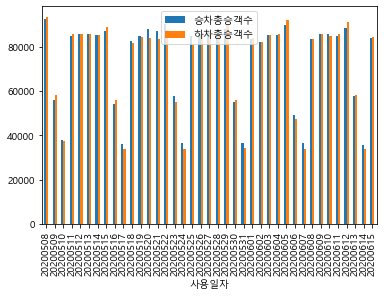

In [38]:
sm_tdate.plot(kind='bar')
plt.rcParams['figure.figsize'] = [50, 3]

일별 승/하차 총합을 비교한 막대 그래프이다. 파란색은 승차, 주황색은 하차이다.

In [39]:
z1=sm.pivot_table(values=['승차총승객수','하차총승객수'], index='사용일자', columns='호선명',
              aggfunc='mean', margins=True)
z1

승차총승객수                                            \
호선명                1호선           2호선           3호선           4호선   
사용일자                                                               
20200508  23656.000000  27757.660000  15303.529412  18945.038462   
20200509  12423.100000  15378.160000   9081.212121  10931.115385   
20200510  10700.300000  11513.100000   6945.151515   8571.846154   
20200511  22034.300000  25980.280000  14076.852941  17767.653846   
20200512  21423.200000  25990.040000  14048.205882  17684.038462   
20200513  21774.300000  26189.520000  14139.911765  17897.961538   
20200514  21602.700000  25811.100000  14031.441176  17690.730769   
20200515  20981.100000  25789.500000  14190.441176  17351.846154   
20200516  13947.800000  15819.920000   9299.294118  11784.538462   
20200517  10297.900000  11171.800000   6707.212121   8449.653846   
20200518  20855.000000  24908.500000  13946.939394  16927.076923   
20200519  20792.500000  25368.300000  13628.500000  17206.230769   
20200520  22601.200000  26600.880000  14863.303030  18437.115385   
20200521  22614.100000  26483.360000  14884.090909  18256.538462   
20200522  23246.700000  27180.300000  15084.205882  18609.230769   
20200523  16060.000000  17420.160000  10265.352941  13021.961538   
20200524  10043.000000  11055.680000   6585.606061   8265.307692   
20200525  22692.200000  26008.720000  14266.000000  18020.153846   
20200526  22423.100000  26296.400000  14351.941176  18191.346154   
20200527  22933.900000  26800.580000  14641.941176  18621.384615   
20200528  22552.300000  26314.880000  14438.117647  18319.692308   
20200529  23136.000000  26964.800000  15076.176471  18757.307692   
20200530  14871.600000  16673.720000  10115.545455  12479.192308   
20200531  10210.200000  11121.480000   6488.411765   8368.615385   
20200601  21745.300000  25542.340000  14420.787879  17825.307692   
20200602  20835.800000  25386.780000  13745.970588  17504.538462   
20200603  22303.900000  26295.660000  14266.441176  18267.653846   
20200604  22089.000000  26232.060000  14787.666667  18102.692308   
20200605  22941.200000  27000.840000  15567.727273  18706.076923   
20200606  13831.000000  15391.200000   8718.970588  11469.961538   
20200607  10382.600000  11189.820000   6804.272727   8298.884615   
20200608  21500.000000  25505.340000  14084.705882  17622.230769   
20200609  21531.600000  25917.380000  14268.264706  17844.269231   
20200610  21899.700000  26313.720000  14363.235294  18048.923077   
20200611  21863.700000  26065.860000  14774.484848  17584.730769   
20200612  22524.900000  26850.120000  15486.848485  18469.269231   
20200613  14497.200000  16895.640000   9795.117647  12261.769231   
20200614  10140.500000  11344.720000   6533.147059   8400.269231   
20200615  21792.900000  25864.660000  14200.794118  17799.538462   
All       19070.558974  22369.102051  12527.801067  15609.274162   

                                                                               \
호선명                5호선          6호선           7호선           8호선           9호선   
사용일자                                                                            
20200508  11803.058824  8417.500000  13635.215686  10872.294118  10820.840000   
20200509   5944.705882  4798.891892   7475.294118   6196.705882   5557.520000   
20200510   4645.372549  3881.432432   5851.509804   4693.941176   4275.640000   
20200511  11263.784314  8039.972973  13047.705882  10244.882353   9984.600000   
20200512  11235.862745  8021.108108  12920.078431  10195.529412   9886.600000   
20200513  11344.901961  7691.794872  13060.000000  10335.176471  10046.600000   
20200514  11158.568627  7978.216216  12910.019608  10429.941176   9948.720000   
20200515  10974.745098  7878.918919  12702.725490  10149.470588  10017.200000   
20200516   6511.411765  4993.447368   8092.137255   6470.941176   5865.720000   
20200517   4767.803922  3789.921053   5882.450980   4747.058824   4310.720000   
20200518  10876.588235  7514.026316  1

In [40]:
z1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 20200508 to All
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (승차총승객수, 1호선)       40 non-null     float64
 1   (승차총승객수, 2호선)       40 non-null     float64
 2   (승차총승객수, 3호선)       40 non-null     float64
 3   (승차총승객수, 4호선)       40 non-null     float64
 4   (승차총승객수, 5호선)       40 non-null     float64
 5   (승차총승객수, 6호선)       40 non-null     float64
 6   (승차총승객수, 7호선)       40 non-null     float64
 7   (승차총승객수, 8호선)       40 non-null     float64
 8   (승차총승객수, 9호선)       40 non-null     float64
 9   (승차총승객수, 9호선2~3단계)  40 non-null     float64
 10  (승차총승객수, 경강선)       40 non-null     float64
 11  (승차총승객수, 경부선)       40 non-null     float64
 12  (승차총승객수, 경원선)       40 non-null     float64
 13  (승차총승객수, 경의선)       40 non-null     float64
 14  (승차총승객수, 경인선)       40 non-null     float64
 15  (승차총승객수, 경춘선)       40 non-null     float64
 16  (승차총승객수

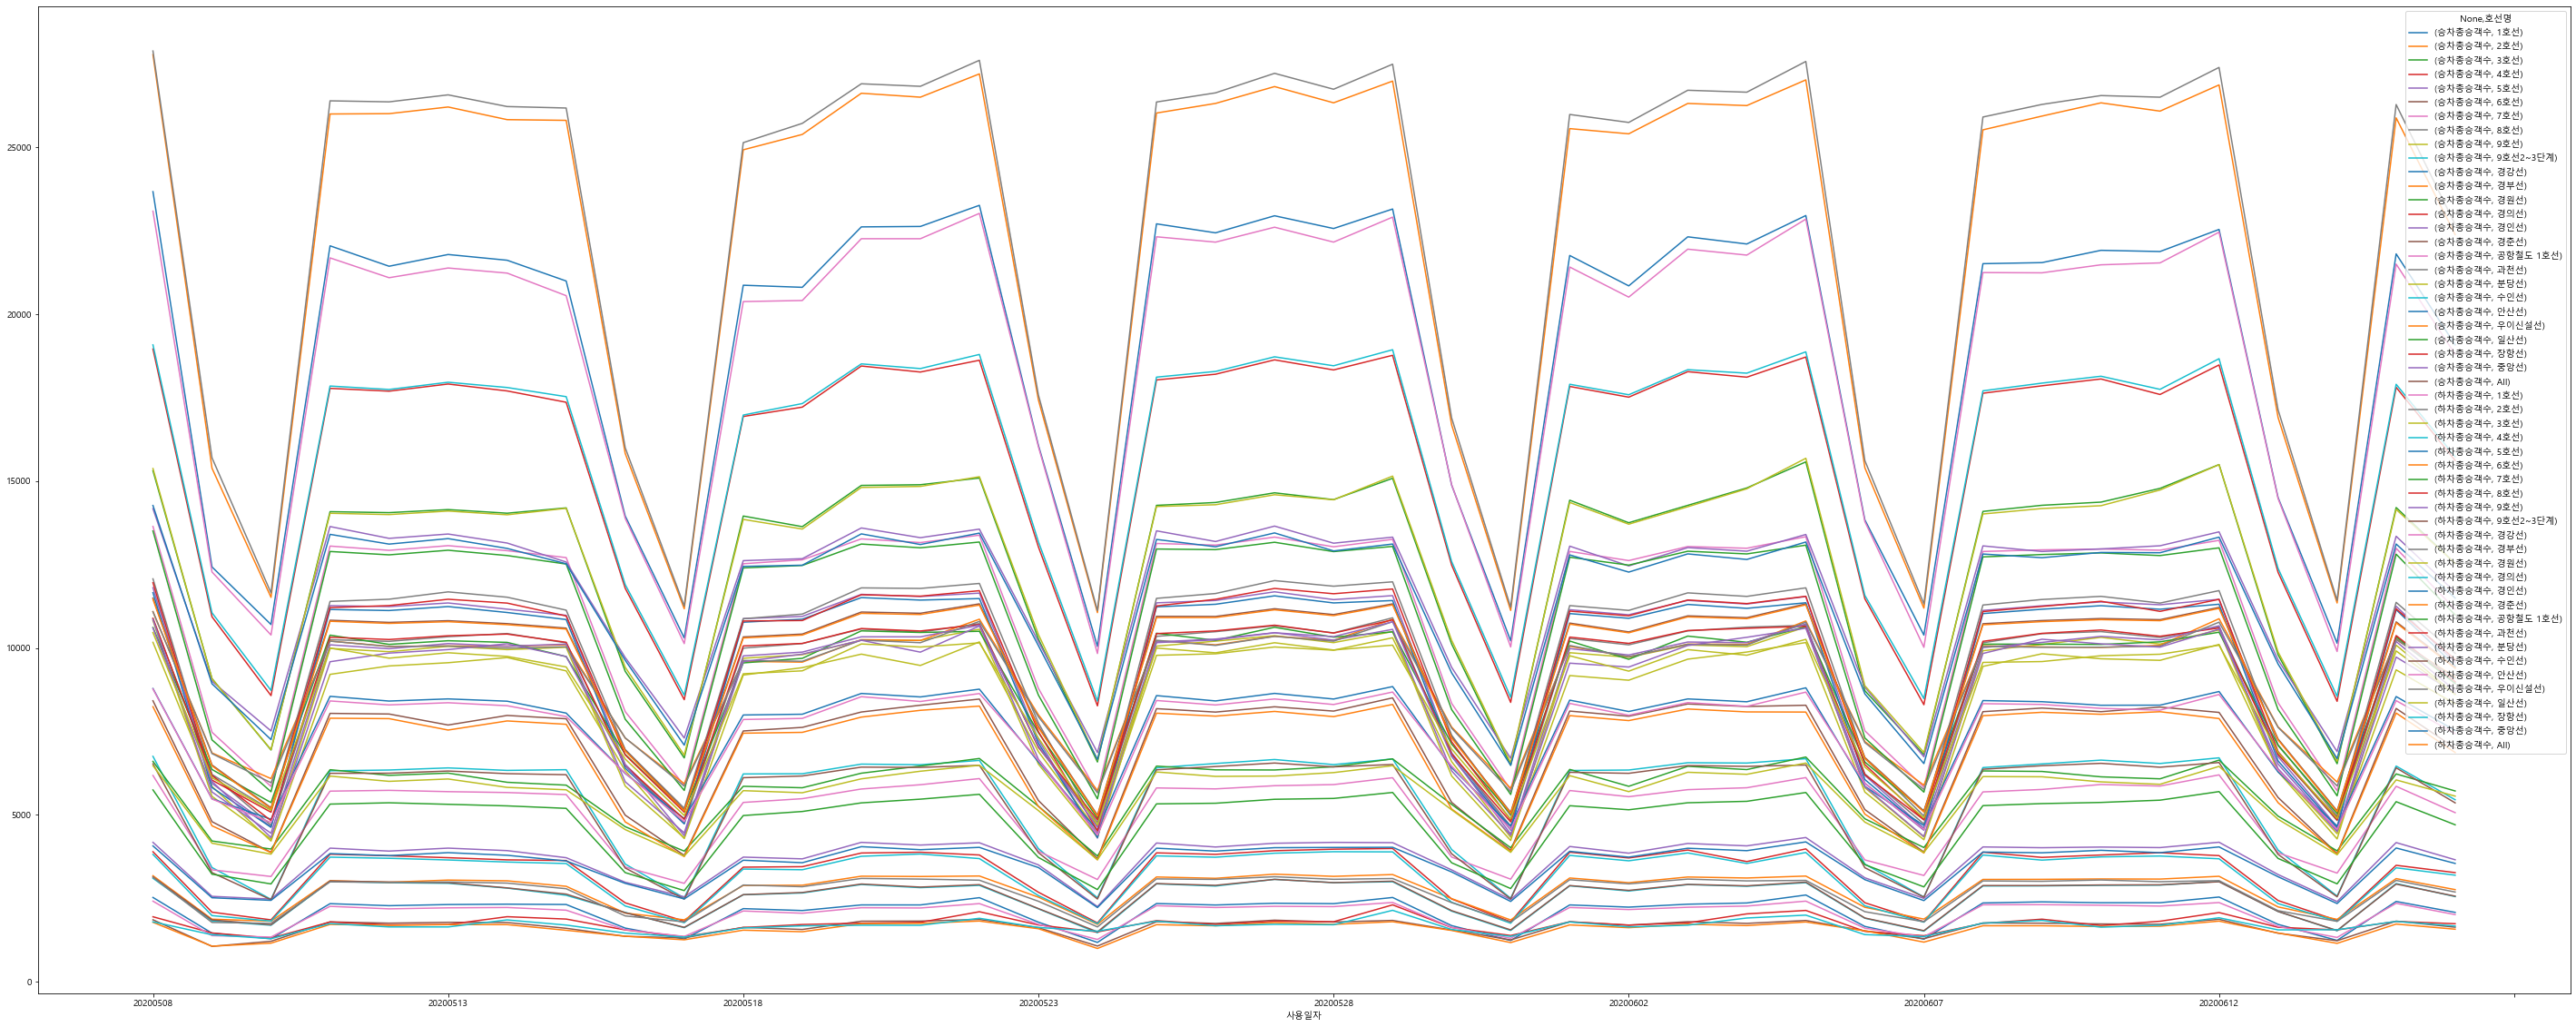

In [45]:
z1.plot()
plt.rcParams['figure.figsize'] = [50, 20]
    
#plt.figure(figsize=(20, 5)

호선별 일일 이용객 수 변화를 나타낸 그래프이다.

이상의 내용을 정리하면 다음과 같다. 어느 호선이던간에 평일의 이용객 숫자가 많으며, 주말에는 감소하는 흐름을 보여주었다. 또 평일에는 미세한 차이긴 하나, 월요일에서부터 금요일까지 수치가 상승하는 추세를 보였으며, 금요일이 이용객 수가 가장 많은 것으로 나타났다.   

# 노선별 가장 붐비는 역과 일일 최다 인원

In [99]:
print( '1호선 일일 최다 승차총승객수         : {}명'.format( line_1.승차총승객수.max() ) )
print( '2호선 일일 최다 승차총승객수         : {}명'.format( line_2.승차총승객수.max() ) )
print( '3호선 일일 최다 승차총승객수         : {}명'.format( line_3.승차총승객수.max() ) )
print( '4호선 일일 최다 승차총승객수         : {}명'.format( line_4.승차총승객수.max() ) )
print( '5호선 일일 최다 승차총승객수         : {}명'.format( line_5.승차총승객수.max() ) )
print( '6호선 일일 최다 승차총승객수         : {}명'.format( line_6.승차총승객수.max() ) )
print( '7호선 일일 최다 승차총승객수         : {}명'.format( line_7.승차총승객수.max() ) )
print( '8호선 일일 최다 승차총승객수         : {}명'.format( line_8.승차총승객수.max() ) )
print( '9호선 일일 최다 승차총승객수         : {}명'.format( line_9.승차총승객수.max() ) )
print( '9호선 2,3단계 일일 최다 승차총승객수 : {}명'.format( line_10.승차총승객수.max() ) )
print( '장항선 일일 최다 승차총승객수         : {}명'.format( line_11.승차총승객수.max() ) )
print( '일산선 일일 최다 승차총승객수         : {}명'.format( line_12.승차총승객수.max() ) )
print( '우이신설선 일일 승차총승객수        : {}명'.format( line_13.승차총승객수.max() ) )
print( '안산선 일일 최다 승차총승객수         : {}명'.format( line_14.승차총승객수.max() ) )
print( '수인선 일일 최다 승차총승객수         : {}명'.format( line_15.승차총승객수.max() ) )
print( '분당선 일일 최다 승차총승객수         : {}명'.format( line_16.승차총승객수.max() ) )
print( '과천선 일일 최다 승차총승객수         : {}명'.format( line_17.승차총승객수.max() ) )
print( '공항철도 1호선 일일 최다 승차총승객수         : {}명'.format( line_18.승차총승객수.max() ) )
print( '경춘선 일일 최다 승차총승객수         : {}명'.format( line_19.승차총승객수.max() ) )
print( '경인선 일일 최다 승차총승객수         : {}명'.format( line_20.승차총승객수.max() ) )
print( '경의선 일일 최다 승차총승객수         : {}명'.format( line_21.승차총승객수.max() ) )
print( '경부선 일일 최다 승차총승객수         : {}명'.format( line_22.승차총승객수.max() ) )
print( '경강선 일일 최다 승차총승객수         : {}명'.format( line_23.승차총승객수.max() ) )
print( '중앙선 일일 최다 승차총승객수         : {}명'.format( line_24.승차총승객수.max() ) )
print( '경원선 일일 최다 승차총승객수         : {}명'.format( line_25.승차총승객수.max() ) )

1호선 일일 최다 승차총승객수         : 49277명
2호선 일일 최다 승차총승객수         : 92741명
3호선 일일 최다 승차총승객수         : 45570명
4호선 일일 최다 승차총승객수         : 35510명
5호선 일일 최다 승차총승객수         : 32859명
6호선 일일 최다 승차총승객수         : 18764명
7호선 일일 최다 승차총승객수         : 49228명
8호선 일일 최다 승차총승객수         : 21848명
9호선 일일 최다 승차총승객수         : 33039명
9호선 2,3단계 일일 최다 승차총승객수 : 16134명
장항선 일일 최다 승차총승객수         : 4425명
일산선 일일 최다 승차총승객수         : 18090명
우이신설선 일일 승차총승객수        : 5736명
안산선 일일 최다 승차총승객수         : 18289명
수인선 일일 최다 승차총승객수         : 5460명
분당선 일일 최다 승차총승객수         : 26394명
과천선 일일 최다 승차총승객수         : 26248명
공항철도 1호선 일일 최다 승차총승객수         : 13897명
경춘선 일일 최다 승차총승객수         : 5915명
경인선 일일 최다 승차총승객수         : 34979명
경의선 일일 최다 승차총승객수         : 10188명
경부선 일일 최다 승차총승객수         : 41722명
경강선 일일 최다 승차총승객수         : 7199명
중앙선 일일 최다 승차총승객수         : 24030명
경원선 일일 최다 승차총승객수         : 18444명


In [98]:
print( '1호선 일일 최다 하차총승객수         : {}명'.format( line_1.하차총승객수.max() ) )
print( '2호선 일일 최다 하차총승객수         : {}명'.format( line_2.하차총승객수.max() ) )
print( '3호선 일일 최다 하차총승객수         : {}명'.format( line_3.하차총승객수.max() ) )
print( '4호선 일일 최다 하차총승객수         : {}명'.format( line_4.하차총승객수.max() ) )
print( '5호선 일일 최다 하차총승객수         : {}명'.format( line_5.하차총승객수.max() ) )
print( '6호선 일일 최다 하차총승객수         : {}명'.format( line_6.하차총승객수.max() ) )
print( '7호선 일일 최다 하차총승객수         : {}명'.format( line_7.하차총승객수.max() ) )
print( '8호선 일일 최다 하차총승객수         : {}명'.format( line_8.하차총승객수.max() ) )
print( '9호선 일일 최다 하차총승객수         : {}명'.format( line_9.하차총승객수.max() ) )
print( '9호선 2,3단계 일일 최다 하차총승객수 : {}명'.format( line_10.하차총승객수.max() ) )
print( '장항선 일일 최다 하차총승객수         : {}명'.format( line_11.하차총승객수.max() ) )
print( '일산선 일일 최다 하차총승객수         : {}명'.format( line_12.하차총승객수.max() ) )
print( '우이신설선 일일 최다 하차총승객수        : {}명'.format( line_13.하차총승객수.max() ) )
print( '안산선 일일 최다 하차총승객수         : {}명'.format( line_14.하차총승객수.max() ) )
print( '수인선 일일 최다 하차총승객수         : {}명'.format( line_15.하차총승객수.max() ) )
print( '분당선 일일 최다 하차총승객수         : {}명'.format( line_16.하차총승객수.max() ) )
print( '과천선 일일 최다 하차총승객수         : {}명'.format( line_17.하차총승객수.max() ) )
print( '공항철도 1호선 일일 최다 하차총승객수         : {}명'.format( line_18.하차총승객수.max() ) )
print( '경춘선 일일 최다 하차총승객수         : {}명'.format( line_19.하차총승객수.max() ) )
print( '경인선 일일 최다 하차총승객수         : {}명'.format( line_20.하차총승객수.max() ) )
print( '경의선 일일 최다 하차총승객수         : {}명'.format( line_21.하차총승객수.max() ) )
print( '경부선 일일 최다 하차총승객수         : {}명'.format( line_22.하차총승객수.max() ) )
print( '경강선 일일 최다 하차총승객수         : {}명'.format( line_23.하차총승객수.max() ) )
print( '중앙선 일일 최다 하차총승객수         : {}명'.format( line_24.하차총승객수.max() ) )
print( '경원선 일일 최다 하차총승객수         : {}명'.format( line_25.하차총승객수.max() ) )

1호선 일일 최다 하차총승객수         : 47873명
2호선 일일 최다 하차총승객수         : 93572명
3호선 일일 최다 하차총승객수         : 51509명
4호선 일일 최다 하차총승객수         : 36151명
5호선 일일 최다 하차총승객수         : 34696명
6호선 일일 최다 하차총승객수         : 18690명
7호선 일일 최다 하차총승객수         : 47954명
8호선 일일 최다 하차총승객수         : 22471명
9호선 일일 최다 하차총승객수         : 33973명
9호선 2,3단계 일일 최다 하차총승객수 : 16325명
장항선 일일 최다 하차총승객수         : 4594명
일산선 일일 최다 하차총승객수         : 18127명
우이신설선 일일 최다 하차총승객수        : 5489명
안산선 일일 최다 하차총승객수         : 18762명
수인선 일일 최다 하차총승객수         : 5769명
분당선 일일 최다 하차총승객수         : 28196명
과천선 일일 최다 하차총승객수         : 26558명
공항철도 1호선 일일 최다 하차총승객수         : 12210명
경춘선 일일 최다 하차총승객수         : 5796명
경인선 일일 최다 하차총승객수         : 36422명
경의선 일일 최다 하차총승객수         : 10044명
경부선 일일 최다 하차총승객수         : 43659명
경강선 일일 최다 하차총승객수         : 6827명
중앙선 일일 최다 하차총승객수         : 22729명
경원선 일일 최다 하차총승객수         : 20059명


이중 내선 각 호선별 지하철에서 가장 붐비는 역을 확인하였다.

In [49]:
line_1[line_1['승차총승객수']==49277]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23055,20200508,1호선,서울역,49277,47873


In [51]:
line_1[line_1['하차총승객수']==47873]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23055,20200508,1호선,서울역,49277,47873


In [52]:
line_1.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
23055,20200508,1호선,서울역,49277,47873
10640,20200529,1호선,서울역,46528,44965
14778,20200522,1호선,서울역,46242,44092
6506,20200605,1호선,서울역,45873,44990
2371,20200612,1호선,서울역,45733,44501


In [53]:
line_1.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
23055,20200508,1호선,서울역,49277,47873
6506,20200605,1호선,서울역,45873,44990
10640,20200529,1호선,서울역,46528,44965
2371,20200612,1호선,서울역,45733,44501
14778,20200522,1호선,서울역,46242,44092


In [55]:
line_2[line_2['승차총승객수']==92741]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572


In [56]:
line_2[line_2['하차총승객수']==93572]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572


In [57]:
line_2.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572
14747,20200522,2호선,강남,90433,87627
6475,20200605,2호선,강남,89729,92155
2340,20200612,2호선,강남,88381,91015
10609,20200529,2호선,강남,88100,90203


In [58]:
line_2.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572
6475,20200605,2호선,강남,89729,92155
2340,20200612,2호선,강남,88381,91015
10609,20200529,2호선,강남,88100,90203
18886,20200515,2호선,강남,86958,89107


In [59]:
line_3[line_3['승차총승객수']==45570]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22975,20200508,3호선,고속터미널,45570,51509


In [60]:
line_3[line_3['하차총승객수']==51509]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22975,20200508,3호선,고속터미널,45570,51509


In [61]:
line_3.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22975,20200508,3호선,고속터미널,45570,51509
14107,20200523,3호선,고속터미널,45315,45888
1699,20200613,3호선,고속터미널,43888,44652
2292,20200612,3호선,고속터미널,43756,46833
6427,20200605,3호선,고속터미널,43746,48402


In [63]:
line_3.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22975,20200508,3호선,고속터미널,45570,51509
6427,20200605,3호선,고속터미널,43746,48402
2292,20200612,3호선,고속터미널,43756,46833
10560,20200529,3호선,고속터미널,42526,45925
14107,20200523,3호선,고속터미널,45315,45888


In [64]:
line_4[line_4['승차총승객수']==35510]

,사용일자,호선명,역명,승차총승객수,하차총승객수
6408,20200605,4호선,수유(강북구청),35510,35298


In [65]:
line_4[line_4['하차총승객수']==36151]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22956,20200508,4호선,수유(강북구청),35334,36151


In [66]:
line_4.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
6408,20200605,4호선,수유(강북구청),35510,35298
22956,20200508,4호선,수유(강북구청),35334,36151
10541,20200529,4호선,수유(강북구청),35158,34601
14679,20200522,4호선,수유(강북구청),34993,34380
2273,20200612,4호선,수유(강북구청),34768,34409


In [67]:
line_4.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22956,20200508,4호선,수유(강북구청),35334,36151
6408,20200605,4호선,수유(강북구청),35510,35298
10541,20200529,4호선,수유(강북구청),35158,34601
2273,20200612,4호선,수유(강북구청),34768,34409
14679,20200522,4호선,수유(강북구청),34993,34380


In [68]:
line_5[line_5['승차총승객수']==32859]

,사용일자,호선명,역명,승차총승객수,하차총승객수
15817,20200520,5호선,광화문(세종문화회관),32859,34696


In [69]:
line_5[line_5['하차총승객수']==34696]

,사용일자,호선명,역명,승차총승객수,하차총승객수
15817,20200520,5호선,광화문(세종문화회관),32859,34696


In [70]:
line_5.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
15817,20200520,5호선,광화문(세종문화회관),32859,34696
22912,20200508,5호선,광화문(세종문화회관),32792,33351
3410,20200610,5호선,광화문(세종문화회관),32682,33560
12271,20200526,5호선,광화문(세종문화회관),32619,33820
11680,20200527,5호선,광화문(세종문화회관),32601,34611


In [71]:
line_5.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
15817,20200520,5호선,광화문(세종문화회관),32859,34696
11680,20200527,5호선,광화문(세종문화회관),32601,34611
11088,20200528,5호선,광화문(세종문화회관),32574,34518
15226,20200521,5호선,광화문(세종문화회관),32068,34076
10497,20200529,5호선,광화문(세종문화회관),31774,34021


In [72]:
line_6[line_6['승차총승객수']==18764]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22868,20200508,6호선,공덕,18764,18690


In [73]:
line_6[line_6['하차총승객수']==18690]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22868,20200508,6호선,공덕,18764,18690


In [74]:
line_6.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22868,20200508,6호선,공덕,18764,18690
10454,20200529,6호선,공덕,18749,18439
14592,20200522,6호선,공덕,18657,18327
11636,20200527,6호선,공덕,18634,18478
15183,20200521,6호선,공덕,18602,18234


In [75]:
line_6.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22868,20200508,6호선,공덕,18764,18690
11636,20200527,6호선,공덕,18634,18478
10454,20200529,6호선,공덕,18749,18439
14592,20200522,6호선,공덕,18657,18327
2185,20200612,6호선,공덕,18494,18301


In [76]:
line_7[line_7['승차총승객수']==49228]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22809,20200508,7호선,가산디지털단지,49228,47567


In [77]:
line_7[line_7['하차총승객수']==47954]

,사용일자,호선명,역명,승차총승객수,하차총승객수
12759,20200525,7호선,가산디지털단지,47362,47954


In [78]:
line_7.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22809,20200508,7호선,가산디지털단지,49228,47567
3307,20200610,7호선,가산디지털단지,47706,47086
12168,20200526,7호선,가산디지털단지,47396,47851
21038,20200511,7호선,가산디지털단지,47396,47425
12759,20200525,7호선,가산디지털단지,47362,47954


In [79]:
line_7.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
12759,20200525,7호선,가산디지털단지,47362,47954
11577,20200527,7호선,가산디지털단지,47232,47873
12168,20200526,7호선,가산디지털단지,47396,47851
15124,20200521,7호선,가산디지털단지,46904,47786
8625,20200601,7호선,가산디지털단지,47109,47586


In [80]:
line_8[line_8['승차총승객수']==21848]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22787,20200508,8호선,문정,21848,22471


In [81]:
line_8[line_8['하차총승객수']==22471]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22787,20200508,8호선,문정,21848,22471


In [82]:
line_8.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22787,20200508,8호선,문정,21848,22471
3285,20200610,8호선,문정,21650,22366
14511,20200522,8호선,문정,21314,21967
12146,20200526,8호선,문정,21301,22284
15692,20200520,8호선,문정,21283,22440


In [83]:
line_8.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22787,20200508,8호선,문정,21848,22471
15692,20200520,8호선,문정,21283,22440
3285,20200610,8호선,문정,21650,22366
12146,20200526,8호선,문정,21301,22284
7420,20200603,8호선,문정,21194,22282


In [84]:
line_9[line_9['승차총승객수']==33039]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22754,20200508,9호선,신논현,33039,33809


In [85]:
line_9[line_9['하차총승객수']==33973]

,사용일자,호선명,역명,승차총승객수,하차총승객수
2070,20200612,9호선,신논현,32109,33973


In [86]:
line_9.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22754,20200508,9호선,신논현,33039,33809
6206,20200605,9호선,신논현,32202,33774
2070,20200612,9호선,신논현,32109,33973
14478,20200522,9호선,신논현,31827,33550
10340,20200529,9호선,신논현,31731,32839


In [87]:
line_9.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
2070,20200612,9호선,신논현,32109,33973
22754,20200508,9호선,신논현,33039,33809
6206,20200605,9호선,신논현,32202,33774
14478,20200522,9호선,신논현,31827,33550
10340,20200529,9호선,신논현,31731,32839


In [89]:
line_10[line_10['승차총승객수']==16134]

,사용일자,호선명,역명,승차총승객수,하차총승객수
22750,20200508,9호선2~3단계,봉은사,16134,15654


In [90]:
line_10[line_10['하차총승객수']==16325]

,사용일자,호선명,역명,승차총승객수,하차총승객수
2066,20200612,9호선2~3단계,봉은사,15975,16325


In [91]:
line_10.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
22750,20200508,9호선2~3단계,봉은사,16134,15654
2066,20200612,9호선2~3단계,봉은사,15975,16325
10336,20200529,9호선2~3단계,봉은사,15601,15666
6202,20200605,9호선2~3단계,봉은사,15561,15774
6794,20200604,9호선2~3단계,봉은사,15442,15564


In [92]:
line_10.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(5)

,사용일자,호선명,역명,승차총승객수,하차총승객수
2066,20200612,9호선2~3단계,봉은사,15975,16325
6202,20200605,9호선2~3단계,봉은사,15561,15774
10336,20200529,9호선2~3단계,봉은사,15601,15666
22750,20200508,9호선2~3단계,봉은사,16134,15654
6794,20200604,9호선2~3단계,봉은사,15442,15564


1호선: 서울역   
2호선: 강남역   
3호선: 고속터미널   
4호선: 수유(강북구청)   
5호선: 광화문(세종문화회관)   
6호선: 공덕   마포구 
7호선: 가산디지털단지   
8호선: 문정   
9호선: 신논현   
9호선 2,3단계: 봉은사   

지금까지 데이터를 살펴본 결과, 지하철 이용객 수는 최대 4천만명에 달하기도 하는 등, 충분히 많은 인원들이 이용하고 있다. 또 거의 모든 역들이 승/하차 비율이 거의 동일한 수치를 보이고 있다.     
또한 일자를 살펴보았을 때, 질병이나 날씨와 같은 외부 변수에 영향이 적고, 일주일이라는 고정적인 요소에만 변동이 나타나고 있다.   
이는 잠재적인 물류 활동 참여자(잠재 아르바이트)가 안정적으로 공급될 수 있고, 예측할 수 있다는 것을 의미한다.    

이를 바탕으로 볼때, 지하철 이용자들을 활용한 물류망 구축은 물리적으로 실현 가능성이 높다고 볼 수 있다.    

더욱 원활한 유통을 위한 허브 지역 설정에 있어서, 절대 이용자수가 상위인 1,2,3,4,5,7호선의 주요 역인 서울역, 강남, 고속터미널, 수유(강북구청), 가산디지털단지, 광화문 중의 중심지역이나 한 곳을 선정하여 지하철 물류 허브 중심지로서 양성하여야 한다.

# -끝-

# 코멘트
중간에 데이터들이 많이 나오는데, 시각화 없이 표만 나와서 좀 아쉬웠다. 그 부분에 시각화 자료 넣어서 이해 돕는 것이 좋겠다. 평균, 표준편차, 분산 등이 쓸모가 없었는데 안 쓸거면 없애는 게 좋겠다.    

eda는 결론이 아니라 데이터를 이해하는 것이다. 이 부분을 좀 유념했으면 좋겠다.

In [101]:
#데이터 처리에 대한 이유. 왜 빠지고 왜 분석하고 왜 했냐
 
#eda는 데이터 자체를 이해하는 것이다.  자의적으로 가공하지 말라.

#주석, 마크다운설명 전 다 붙여줘라. 

# 여기까지 홀드

In [ ]:
line_11=sm.groupby('호선명').get_group('장항선')
line_12=sm.groupby('호선명').get_group('일산선')
line_13=sm.groupby('호선명').get_group('우이신설선')
line_14=sm.groupby('호선명').get_group('안산선')
line_15=sm.groupby('호선명').get_group('수인선')
line_16=sm.groupby('호선명').get_group('분당선')
line_17=sm.groupby('호선명').get_group('과천선')
line_18=sm.groupby('호선명').get_group('공항철도 1호선')
line_19=sm.groupby('호선명').get_group('경춘선')
line_20=sm.groupby('호선명').get_group('경인선')
line_21=sm.groupby('호선명').get_group('경의선')
line_22=sm.groupby('호선명').get_group('경부선')
line_23=sm.groupby('호선명').get_group('경강선')
line_24=sm.groupby('호선명').get_group('중앙선')
line_25=sm.groupby('호선명').get_group('경원선')

In [176]:
print( '1호선 최다 승차총승객수         : {}명'.format( line_1.승차총승객수.max() ) )
print( '2호선 최다 승차총승객수         : {}명'.format( line_2.승차총승객수.max() ) )
print( '3호선 최다 승차총승객수         : {}명'.format( line_3.승차총승객수.max() ) )
print( '4호선 최다 승차총승객수         : {}명'.format( line_4.승차총승객수.max() ) )
print( '5호선 최다 승차총승객수         : {}명'.format( line_5.승차총승객수.max() ) )
print( '6호선 최다 승차총승객수         : {}명'.format( line_6.승차총승객수.max() ) )
print( '7호선 최다 승차총승객수         : {}명'.format( line_7.승차총승객수.max() ) )
print( '8호선 최다 승차총승객수         : {}명'.format( line_8.승차총승객수.max() ) )
print( '9호선 최다 승차총승객수         : {}명'.format( line_9.승차총승객수.max() ) )
print( '9호선 2,3단계 최다 승차총승객수 : {}명'.format( line_10.승차총승객수.max() ) )
print( '장항선 최다 승차총승객수         : {}명'.format( line_11.승차총승객수.max() ) )
print( '일산선 승차총승객수         : {}명'.format( line_12.승차총승객수.max() ) )
print( '우이신설선 승차총승객수        : {}명'.format( line_13.승차총승객수.max() ) )
print( '안산선 최다 승차총승객수         : {}명'.format( line_14.승차총승객수.max() ) )
print( '수인선 최다 승차총승객수         : {}명'.format( line_15.승차총승객수.max() ) )
print( '분당선 최다 승차총승객수         : {}명'.format( line_16.승차총승객수.max() ) )
print( '과천선 최다 승차총승객수         : {}명'.format( line_17.승차총승객수.max() ) )
print( '공항철도 1호선 최다 승차총승객수         : {}명'.format( line_18.승차총승객수.max() ) )
print( '경춘선 최다 승차총승객수         : {}명'.format( line_19.승차총승객수.max() ) )
print( '경인선 최다 승차총승객수         : {}명'.format( line_20.승차총승객수.max() ) )
print( '경의선 최다 승차총승객수         : {}명'.format( line_21.승차총승객수.max() ) )
print( '경부선 최다 승차총승객수         : {}명'.format( line_22.승차총승객수.max() ) )
print( '경강선 최다 승차총승객수         : {}명'.format( line_23.승차총승객수.max() ) )
print( '중앙선 최다 승차총승객수         : {}명'.format( line_24.승차총승객수.max() ) )
print( '경원선 최다 승차총승객수         : {}명'.format( line_25.승차총승객수.max() ) )

1호선 최다 승차총승객수         : 49277명
2호선 최다 승차총승객수         : 92741명
3호선 최다 승차총승객수         : 45570명
4호선 최다 승차총승객수         : 35510명
5호선 최다 승차총승객수         : 32859명
6호선 최다 승차총승객수         : 18764명
7호선 최다 승차총승객수         : 49228명
8호선 최다 승차총승객수         : 21848명
9호선 최다 승차총승객수         : 33039명
9호선 2,3단계 최다 승차총승객수 : 16134명
장항선 최다 승차총승객수         : 4425명
일산선 승차총승객수         : 18090명
우이신설선 승차총승객수        : 5736명
안산선 최다 승차총승객수         : 18289명
수인선 최다 승차총승객수         : 5460명
분당선 최다 승차총승객수         : 26394명
과천선 최다 승차총승객수         : 26248명
공항철도 1호선 최다 승차총승객수         : 13897명
경춘선 최다 승차총승객수         : 5915명
경인선 최다 승차총승객수         : 34979명
경의선 최다 승차총승객수         : 10188명
경부선 최다 승차총승객수         : 41722명
경강선 최다 승차총승객수         : 7199명
중앙선 최다 승차총승객수         : 24030명
경원선 최다 승차총승객수         : 18444명


In [232]:
print( '1호선 최다 승차총승객수         : {}명'.format( line_1['역명']==line_1.승차총승객수.max() ) )

1호선 최다 승차총승객수         : 585      False
586      False
587      False
588      False
589      False
         ...  
23051    False
23052    False
23053    False
23054    False
23055    False
Name: 역명, Length: 390, dtype: bool명


In [ ]:
d_l1[d_l1['승차총승객수']==24030]

In [ ]:
#각 호선별 승하차 이용객수 히스토그램으로 표기한 후 서로 비교
#각 호선별 최다 이용객 수 역 산출, 이후 다른 호선 역들과 비교
#

# 여기까지 홀드

# 기본 통계 분석 

먼저 승/하차 총 승객수에 대한 기본적인 분석을 실시하였다.

In [66]:
sm['승차총승객수'].describe()

count    23056.000000
mean      9423.149592
std       9572.804504
min          1.000000
25%       3127.000000
50%       6668.500000
75%      12389.250000
max      92741.000000
Name: 승차총승객수, dtype: float64

In [67]:
sm['하차총승객수'].describe()

count    23056.000000
mean      9392.392566
std       9704.598493
min          0.000000
25%       3037.000000
50%       6511.500000
75%      12121.250000
max      93572.000000
Name: 하차총승객수, dtype: float64

상술한 분석결과를 바탕으로, 승/하차 총승객수의 최대값과 최소값을 구한 다음, 어느 시기의 역이 해당되는지를 파악하였다.

In [16]:
sm[sm['승차총승객수']==92741]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572


In [17]:
sm[sm['승차총승객수']==1]

,사용일자,호선명,역명,승차총승객수,하차총승객수
103,20200615,분당선,복정,1,0
172,20200615,경의선,검암,1,0
173,20200615,경의선,계양,1,0
174,20200615,경의선,홍대입구,1,0
217,20200615,경원선,창동,1,0
...,...,...,...,...,...
20620,20200512,3호선,충무로,1,0
20796,20200511,분당선,복정,1,0
22045,20200509,경의선,계양,1,0
22635,20200508,경의선,서울역,1,0


승차 총승객수가 가장 많았던 곳은 5월 8일의 2호선 강남역(92741명)으로 나타났으며,    
가장 적었던 곳은 총 69개역으로 나타났으며, 수는 1명으로 나타났다.   

다음은 하차승객수에 대한 분석이다.

In [18]:
sm[sm['하차총승객수']==93572]

,사용일자,호선명,역명,승차총승객수,하차총승객수
23024,20200508,2호선,강남,92741,93572


In [19]:
sm[sm['하차총승객수']==0]

,사용일자,호선명,역명,승차총승객수,하차총승객수
103,20200615,분당선,복정,1,0
172,20200615,경의선,검암,1,0
173,20200615,경의선,계양,1,0
174,20200615,경의선,홍대입구,1,0
217,20200615,경원선,창동,1,0
...,...,...,...,...,...
21387,20200510,분당선,복정,2,0
22045,20200509,경의선,계양,1,0
22635,20200508,경의선,서울역,1,0
22880,20200508,6호선,연신내,1,0


하차총승객수가 가장 많았던 곳은 5월 8일의 2호선 강남역(93572명)으로 나타났으며,   
가장 적었던 곳은 총 85개역으로 나타났으며, 수는 0명으로 나타났다.

# 각 노선별 승하차 승객 수 비교  

-5월 8일부터 6월 15일까지 각 호선별 누적 승하차 승객 수를 비교하여 노선별 절대적 특징 및 상대적 특징을 분류한다.

In [21]:
'중앙선', '장항선', '일산선', '우이신설선', '안산선', 
'수인선', '분당선', '과천선',
       '공항철도 1호선', '경춘선', '경인선', '경의선', '경원선'
    , '경부선', '경강선', '9호선2~3단계',
       '9호선', '8호선', '7호선', '6호선', '5호선', '4호선',
        '3호선', '2호선', '1호선'],

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [22]:
l1=sm['호선명']=='중앙선'
all_day=sm['사용일자']
all_day_l1=sm[l1&all_day]
d_l1=pd.DataFrame(all_day_l1)

In [ ]:
d_l1.describe()
d_l1[d_l1['승차총승객수']==24030]
d_l1[d_l1['하차총승객수']==22729]
extop1=d_l1.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(10)
extop1
extop2=d_l1.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(10)
extop2

In [114]:
d_l1.describe()

,사용일자,승차총승객수,하차총승객수
count,4.200000e+02,420.000000,420.000000
mean,2.020056e+07,3677.471429,3560.764286
std,4.358995e+01,4938.467251,4803.239570
min,2.020051e+07,21.000000,29.000000
25%,2.020052e+07,565.750000,559.750000
50%,2.020053e+07,1766.000000,1764.500000
75%,2.020061e+07,5380.000000,5207.750000
max,2.020062e+07,24030.000000,22729.000000


In [122]:
d_l1[d_l1['승차총승객수']==24030]

,사용일자,호선명,역명,승차총승객수,하차총승객수
5937,20200605,중앙선,회기,24030,22729


In [123]:
d_l1[d_l1['하차총승객수']==22729]

,사용일자,호선명,역명,승차총승객수,하차총승객수
5937,20200605,중앙선,회기,24030,22729


In [130]:
extop1=d_l1.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(10)
extop1

,사용일자,호선명,역명,승차총승객수,하차총승객수
5937,20200605,중앙선,회기,24030,22729
10070,20200529,중앙선,회기,23625,22477
11252,20200527,중앙선,회기,23097,22423
20,20200615,중앙선,회기,22940,22359
7118,20200603,중앙선,회기,22891,22023
12435,20200525,중앙선,회기,22578,22083
2392,20200611,중앙선,회기,22505,21442
14799,20200521,중앙선,회기,22470,21800
8300,20200601,중앙선,회기,22338,21772
3574,20200609,중앙선,회기,22275,21496


In [131]:
extop2=d_l1.sort_values(by='하차총승객수',ascending=False).groupby('호선명').head(10)
extop2

,사용일자,호선명,역명,승차총승객수,하차총승객수
5937,20200605,중앙선,회기,24030,22729
10070,20200529,중앙선,회기,23625,22477
11252,20200527,중앙선,회기,23097,22423
20,20200615,중앙선,회기,22940,22359
12435,20200525,중앙선,회기,22578,22083
7118,20200603,중앙선,회기,22891,22023
14799,20200521,중앙선,회기,22470,21800
8300,20200601,중앙선,회기,22338,21772
20713,20200511,중앙선,회기,22051,21663
3574,20200609,중앙선,회기,22275,21496


이상 중앙선을 기준으로 데이터를 정리하였을 때, 위와 같은 결과가 나왔다. 해당 과정이 반복이기에, 반복문을 설정하여 간편한 정리를 시도하기로 하였다. 

In [148]:
sm1=sm.astype(int)

ValueError: invalid literal for int() with base 10: '중앙선'

In [142]:
pd.Series(['호선명'])

0    호선명
dtype: object

In [140]:
sm.apply(['호선명'],axis=0)

AttributeError: '호선명' is not a valid function for 'Series' object

In [40]:
line_1.describe()

,사용일자,승차총승객수,하차총승객수
count,3.900000e+02,390.000000,390.000000
mean,2.020055e+07,19070.558974,18786.912821
std,4.353520e+01,10227.057676,9690.608399
min,2.020051e+07,4734.000000,4908.000000
25%,2.020052e+07,11209.500000,11216.250000
50%,2.020053e+07,16975.000000,17236.500000
75%,2.020061e+07,23031.750000,22829.250000
max,2.020062e+07,49277.000000,47873.000000


In [ ]:
#





In [ ]:
i=sm['호선명'].unique():
    while i ==i

In [ ]:
l1=sm['호선명']=='중앙선'
all_day=sm['사용일자']
all_day_l1=sm[l1&all_day]
d_l1=pd.DataFrame(all_day_l1)
d_l1.describe()

In [ ]:
-직관에 따른 데이터 관찰 및 1차 분석방향    

-1. 요일별 승하차 통계(공휴일 유무 적용)   
-1-1. 추가 임무:코로나 사태 관련 감염자 발생 위치와 관련된 변화    
-2. 호선별 누적 승하차 비교    
-2-1. 추가 임무: 일자별 호선별 승하차 비교 시각화 및 전체 비교     
-3. 각 역별 승하차 비교 후 가장 수치가 높/작 역 파악    
3-1. 추가 임무: 상위 순위 역 선정 후 일자별로 승하차 변화 비교     
-4. 전체 비교 중 가장 승/하차가 높은 호선, 역 선정   

-추가: 날짜 활용하기. 반드시! 우리는 데이터 이해지 분석기술이 아니다! 생각을 잘 할 것.   

# 쓰레기통

In [24]:
#sm1=open('4.서울시 지하철호선별 역별 승하차 인원 정보.csv','r')
#rdr=csv.reader(sm1)
#for line in rdr:
#    print(line)
#f.close()

['사용일자', '호선명', '역명', '승차총승객수', '하차총승객수', '등록일자']
['20200615', '중앙선', '지평', '55', '40', '20200618']
['20200615', '중앙선', '용문', '2827', '2795', '20200618']
['20200615', '중앙선', '원덕', '371', '363', '20200618']
['20200615', '중앙선', '양평', '2564', '2572', '20200618']
['20200615', '중앙선', '오빈', '302', '280', '20200618']
['20200615', '중앙선', '아신', '565', '559', '20200618']
['20200615', '중앙선', '국수', '719', '707', '20200618']
['20200615', '중앙선', '신원', '203', '165', '20200618']
['20200615', '중앙선', '양수', '1842', '1852', '20200618']
['20200615', '중앙선', '운길산', '848', '772', '20200618']
['20200615', '중앙선', '팔당', '835', '860', '20200618']
['20200615', '중앙선', '도심', '2626', '2010', '20200618']
['20200615', '중앙선', '덕소', '5907', '5786', '20200618']
['20200615', '중앙선', '양정', '904', '782', '20200618']
['20200615', '중앙선', '도농', '10236', '9006', '20200618']
['20200615', '중앙선', '구리', '13406', '13387', '20200618']
['20200615', '중앙선', '양원', '1802', '1868', '20200618']
['20200615', '중앙선', '망우', '7437', '7216', '20200

['20200612', '1호선', '시청', '20684', '21205', '20200615']
['20200612', '1호선', '서울역', '45733', '44501', '20200615']
['20200611', '중앙선', '지평', '71', '49', '20200614']
['20200611', '중앙선', '용문', '1796', '1841', '20200614']
['20200611', '중앙선', '원덕', '307', '298', '20200614']
['20200611', '중앙선', '양평', '2475', '2462', '20200614']
['20200611', '중앙선', '오빈', '293', '281', '20200614']
['20200611', '중앙선', '아신', '495', '516', '20200614']
['20200611', '중앙선', '국수', '740', '723', '20200614']
['20200611', '중앙선', '신원', '223', '220', '20200614']
['20200611', '중앙선', '양수', '1817', '1820', '20200614']
['20200611', '중앙선', '운길산', '914', '919', '20200614']
['20200611', '중앙선', '팔당', '790', '783', '20200614']
['20200611', '중앙선', '도심', '2548', '2003', '20200614']
['20200611', '중앙선', '덕소', '5585', '5718', '20200614']
['20200611', '중앙선', '양정', '847', '742', '20200614']
['20200611', '중앙선', '도농', '9842', '8708', '20200614']
['20200611', '중앙선', '구리', '13052', '13069', '20200614']
['20200611', '중앙선', '양원', '1751', '1843'

['20200607', '경춘선', '금곡', '778', '786', '20200610']
['20200607', '경춘선', '사릉', '1528', '1572', '20200610']
['20200607', '경춘선', '퇴계원', '1776', '1763', '20200610']
['20200607', '경춘선', '별내', '1478', '1445', '20200610']
['20200607', '경춘선', '갈매', '1173', '1104', '20200610']
['20200607', '경춘선', '신내', '729', '771', '20200610']
['20200607', '경인선', '도화', '1681', '1594', '20200610']
['20200607', '경인선', '중동', '4045', '3709', '20200610']
['20200607', '경인선', '온수(성공회대입구)', '3161', '3043', '20200610']
['20200607', '경인선', '도원', '1371', '1420', '20200610']
['20200607', '경인선', '간석', '2588', '2436', '20200610']
['20200607', '경인선', '부개', '3754', '3617', '20200610']
['20200607', '경인선', '소사', '5164', '4800', '20200610']
['20200607', '경인선', '구일', '2934', '2968', '20200610']
['20200607', '경인선', '인천', '2408', '1964', '20200610']
['20200607', '경인선', '동인천', '7552', '7122', '20200610']
['20200607', '경인선', '제물포', '4313', '4107', '20200610']
['20200607', '경인선', '주안', '9489', '8547', '20200610']
['20200607', '경인선', '

['20200603', '공항철도 1호선', '홍대입구', '7238', '7387', '20200606']
['20200603', '공항철도 1호선', '공덕', '1969', '2601', '20200606']
['20200603', '공항철도 1호선', '서울역', '5724', '5298', '20200606']
['20200603', '경춘선', '춘천', '1151', '1008', '20200606']
['20200603', '경춘선', '남춘천', '1980', '2073', '20200606']
['20200603', '경춘선', '김유정', '258', '254', '20200606']
['20200603', '경춘선', '강촌', '435', '428', '20200606']
['20200603', '경춘선', '백양리', '98', '96', '20200606']
['20200603', '경춘선', '굴봉산', '149', '157', '20200606']
['20200603', '경춘선', '가평', '1476', '1561', '20200606']
['20200603', '경춘선', '상천', '262', '266', '20200606']
['20200603', '경춘선', '청평', '1564', '1574', '20200606']
['20200603', '경춘선', '대성리', '462', '463', '20200606']
['20200603', '경춘선', '마석', '3784', '3661', '20200606']
['20200603', '경춘선', '천마산', '1566', '1423', '20200606']
['20200603', '경춘선', '평내호평', '5788', '5632', '20200606']
['20200603', '경춘선', '금곡', '1499', '1369', '20200606']
['20200603', '경춘선', '사릉', '3461', '3312', '20200606']
['20200603', '경춘

['20200530', '7호선', '청담', '10625', '11238', '20200602']
['20200530', '7호선', '뚝섬유원지', '11973', '12291', '20200602']
['20200530', '7호선', '건대입구', '9959', '10422', '20200602']
['20200530', '7호선', '어린이대공원(세종대)', '8052', '7685', '20200602']
['20200530', '7호선', '군자(능동)', '9952', '7555', '20200602']
['20200530', '7호선', '중곡', '6725', '6243', '20200602']
['20200530', '7호선', '용마산(용마폭포공원)', '4168', '4144', '20200602']
['20200530', '7호선', '사가정', '11599', '11183', '20200602']
['20200530', '7호선', '면목', '10833', '10479', '20200602']
['20200530', '7호선', '상봉(시외버스터미널)', '12391', '11892', '20200602']
['20200530', '7호선', '중화', '7867', '7313', '20200602']
['20200530', '7호선', '먹골', '8011', '7792', '20200602']
['20200530', '7호선', '태릉입구', '6654', '6277', '20200602']
['20200530', '7호선', '공릉(서울과학기술대)', '8291', '8439', '20200602']
['20200530', '7호선', '하계', '12587', '11676', '20200602']
['20200530', '7호선', '중계', '8970', '7901', '20200602']
['20200530', '7호선', '노원', '14754', '15711', '20200602']
['20200530', '7호선',

['20200525', '중앙선', '운길산', '853', '812', '20200528']
['20200525', '중앙선', '팔당', '858', '809', '20200528']
['20200525', '중앙선', '도심', '2614', '2053', '20200528']
['20200525', '중앙선', '덕소', '5981', '5747', '20200528']
['20200525', '중앙선', '양정', '916', '794', '20200528']
['20200525', '중앙선', '도농', '9961', '8864', '20200528']
['20200525', '중앙선', '구리', '13593', '13585', '20200528']
['20200525', '중앙선', '양원', '1525', '1547', '20200528']
['20200525', '중앙선', '망우', '7439', '7291', '20200528']
['20200525', '중앙선', '상봉(시외버스터미널)', '5900', '5734', '20200528']
['20200525', '중앙선', '중랑', '5537', '5278', '20200528']
['20200525', '중앙선', '회기', '22578', '22083', '20200528']
['20200525', '장항선', '신창(순천향대)', '1345', '1543', '20200528']
['20200525', '장항선', '온양온천', '3350', '3363', '20200528']
['20200525', '장항선', '배방', '833', '866', '20200528']
['20200525', '장항선', '아산', '2433', '2252', '20200528']
['20200525', '장항선', '쌍용(나사렛대)', '1887', '1815', '20200528']
['20200525', '장항선', '봉명', '1173', '1094', '20200528']
['202005

['20200521', '경부선', '수원', '32128', '34303', '20200524']
['20200521', '경부선', '화서', '7306', '7072', '20200524']
['20200521', '경부선', '성균관대', '13273', '13006', '20200524']
['20200521', '경부선', '의왕', '8923', '8703', '20200524']
['20200521', '경부선', '군포', '7346', '7291', '20200524']
['20200521', '경부선', '금정', '25521', '26091', '20200524']
['20200521', '경부선', '명학', '9257', '9110', '20200524']
['20200521', '경부선', '안양', '20327', '20392', '20200524']
['20200521', '경부선', '관악', '7317', '6775', '20200524']
['20200521', '경부선', '석수', '10183', '8955', '20200524']
['20200521', '경부선', '금천구청', '11534', '11387', '20200524']
['20200521', '경부선', '가산디지털단지', '18933', '21536', '20200524']
['20200521', '경부선', '구로', '17588', '17877', '20200524']
['20200521', '경부선', '신길', '9428', '7978', '20200524']
['20200521', '경부선', '신도림', '4073', '4025', '20200524']
['20200521', '경부선', '영등포', '36253', '37281', '20200524']
['20200521', '경부선', '대방', '13427', '13556', '20200524']
['20200521', '경부선', '노량진', '8735', '8654', '20200524

['20200517', '5호선', '마천', '2948', '3240', '20200520']
['20200517', '5호선', '거여', '3295', '3176', '20200520']
['20200517', '5호선', '개롱', '3000', '3179', '20200520']
['20200517', '5호선', '오금', '1591', '1485', '20200520']
['20200517', '5호선', '방이', '3605', '3402', '20200520']
['20200517', '5호선', '올림픽공원(한국체대)', '1936', '1662', '20200520']
['20200517', '5호선', '둔촌동', '4011', '4053', '20200520']
['20200517', '5호선', '상일동', '6766', '6396', '20200520']
['20200517', '5호선', '고덕', '3353', '3418', '20200520']
['20200517', '5호선', '명일', '3577', '3581', '20200520']
['20200517', '5호선', '굽은다리(강동구민회관앞)', '4264', '4047', '20200520']
['20200517', '5호선', '길동', '3398', '3477', '20200520']
['20200517', '5호선', '강동', '9240', '8543', '20200520']
['20200517', '5호선', '천호(풍납토성)', '10973', '10549', '20200520']
['20200517', '5호선', '광나루(장신대)', '6821', '6782', '20200520']
['20200517', '5호선', '아차산(어린이대공원후문)', '9396', '9792', '20200520']
['20200517', '5호선', '군자(능동)', '5276', '5707', '20200520']
['20200517', '5호선', '장한평', '626

['20200512', '공항철도 1호선', '공항화물청사', '2359', '2620', '20200515']
['20200512', '공항철도 1호선', '운서', '5671', '5671', '20200515']
['20200512', '공항철도 1호선', '청라국제도시', '6046', '5699', '20200515']
['20200512', '공항철도 1호선', '검암', '7282', '7047', '20200515']
['20200512', '공항철도 1호선', '계양', '9084', '8208', '20200515']
['20200512', '공항철도 1호선', '김포공항', '7460', '5062', '20200515']
['20200512', '공항철도 1호선', '마곡나루(서울식물원)', '7488', '6933', '20200515']
['20200512', '공항철도 1호선', '디지털미디어시티', '12833', '11752', '20200515']
['20200512', '공항철도 1호선', '홍대입구', '6921', '7153', '20200515']
['20200512', '공항철도 1호선', '공덕', '1978', '2491', '20200515']
['20200512', '공항철도 1호선', '서울역', '5831', '5224', '20200515']
['20200512', '경춘선', '춘천', '1149', '1055', '20200515']
['20200512', '경춘선', '남춘천', '2265', '2359', '20200515']
['20200512', '경춘선', '김유정', '279', '278', '20200515']
['20200512', '경춘선', '강촌', '368', '337', '20200515']
['20200512', '경춘선', '백양리', '92', '103', '20200515']
['20200512', '경춘선', '굴봉산', '186', '184', '20200515']
['

['20200508', '경강선', '초월', '2759', '2644', '20200511']
['20200508', '경강선', '경기광주', '7043', '6827', '20200511']
['20200508', '경강선', '삼동', '2268', '2091', '20200511']
['20200508', '경강선', '이매', '1104', '918', '20200511']
['20200508', '경강선', '판교', '4568', '4256', '20200511']
['20200508', '9호선2~3단계', '중앙보훈병원', '9532', '8696', '20200511']
['20200508', '9호선2~3단계', '둔촌오륜', '896', '817', '20200511']
['20200508', '9호선2~3단계', '올림픽공원(한국체대)', '5107', '4982', '20200511']
['20200508', '9호선2~3단계', '한성백제', '2277', '2081', '20200511']
['20200508', '9호선2~3단계', '송파나루', '4037', '4254', '20200511']
['20200508', '9호선2~3단계', '석촌', '7351', '6286', '20200511']
['20200508', '9호선2~3단계', '석촌고분', '5284', '5240', '20200511']
['20200508', '9호선2~3단계', '삼전', '6266', '6198', '20200511']
['20200508', '9호선2~3단계', '종합운동장', '4193', '4076', '20200511']
['20200508', '9호선2~3단계', '봉은사', '16134', '15654', '20200511']
['20200508', '9호선2~3단계', '삼성중앙', '6961', '6844', '20200511']
['20200508', '9호선2~3단계', '선정릉', '9618', '10034', '202

NameError: name 'f' is not defined

In [33]:
#sm3=pd.DataFrame([sm1])

In [37]:
#sm=pd.read_csv('4.서울시 지하철호선별 역별 승하차 인원 정보.csv')

In [34]:
#sm3

""
0


<_io.TextIOWrapper name='4.서울시 지하철호선별 역별 승하차 인원 정보.csv' mode='r' encoding='cp949'>

In [ ]:
line_1.describe()
line_1['역명'].unique()
line_1.sort_values(by='승차총승객수',ascending=False).groupby('호선명').head(10)